# (Core) Preparing Time Series from Wide-Form Data- *David Atkins*


In [29]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import os
import matplotlib.ticker as mticks

import warnings
warnings.filterwarnings("ignore")

##### Functions

In [27]:
def k_convert (x,pos):
    x2 = x/1_000
    return f"{x2:,.0f}K"

### Part 1 - Preparing Dataset

In [4]:
url = "https://docs.google.com/spreadsheets/d/e/2PACX-1vQN3Ksa9szQuO4G1-msXWAp17KtVHQCBnuEieu_auu1wSiBf3-krHusIx5VBMkihxj-KZLBosDIGEyR/pub?output=csv"
df = pd.read_csv(url)
df.head()

,RegionID,SizeRank,RegionName,RegionType,StateName,State,Metro,CountyName,2000-01-31,2000-02-29,...,2021-12-31,2022-01-31,2022-02-28,2022-03-31,2022-04-30,2022-05-31,2022-06-30,2022-07-31,2022-08-31,2022-09-30
0,6181,0,New York,city,NY,NY,"New York-Newark-Jersey City, NY-NJ-PA",Queens County,253690.0,255517.0,...,741586.0,745686.0,750578.0,756734.0,762321.0,768797.0,773944.0,777692.0,779960.0,781622.0
1,12447,1,Los Angeles,city,CA,CA,"Los Angeles-Long Beach-Anaheim, CA",Los Angeles County,234181.0,234401.0,...,924019.0,928991.0,937936.0,953874.0,973168.0,990391.0,992337.0,992630.0,978196.0,966595.0
2,39051,2,Houston,city,TX,TX,"Houston-The Woodlands-Sugar Land, TX",Harris County,109068.0,109079.0,...,245783.0,248718.0,252080.0,256435.0,261101.0,265558.0,268901.0,271059.0,272400.0,272639.0
3,17426,3,Chicago,city,IL,IL,"Chicago-Naperville-Elgin, IL-IN-WI",Cook County,166139.0,166536.0,...,302821.0,305104.0,306404.0,308303.0,309649.0,312487.0,314663.0,315910.0,315587.0,315429.0
4,6915,4,San Antonio,city,TX,TX,"San Antonio-New Braunfels, TX",Bexar County,114794.0,114975.0,...,269323.0,274032.0,278464.0,284127.0,289739.0,294776.0,297727.0,298796.0,299124.0,298951.0


In [8]:
df=df[df['SizeRank']<4]
df.head()

,RegionID,SizeRank,RegionName,RegionType,StateName,State,Metro,CountyName,2000-01-31,2000-02-29,...,2021-12-31,2022-01-31,2022-02-28,2022-03-31,2022-04-30,2022-05-31,2022-06-30,2022-07-31,2022-08-31,2022-09-30
0,6181,0,New York,city,NY,NY,"New York-Newark-Jersey City, NY-NJ-PA",Queens County,253690.0,255517.0,...,741586.0,745686.0,750578.0,756734.0,762321.0,768797.0,773944.0,777692.0,779960.0,781622.0
1,12447,1,Los Angeles,city,CA,CA,"Los Angeles-Long Beach-Anaheim, CA",Los Angeles County,234181.0,234401.0,...,924019.0,928991.0,937936.0,953874.0,973168.0,990391.0,992337.0,992630.0,978196.0,966595.0
2,39051,2,Houston,city,TX,TX,"Houston-The Woodlands-Sugar Land, TX",Harris County,109068.0,109079.0,...,245783.0,248718.0,252080.0,256435.0,261101.0,265558.0,268901.0,271059.0,272400.0,272639.0
3,17426,3,Chicago,city,IL,IL,"Chicago-Naperville-Elgin, IL-IN-WI",Cook County,166139.0,166536.0,...,302821.0,305104.0,306404.0,308303.0,309649.0,312487.0,314663.0,315910.0,315587.0,315429.0


In [20]:
ts=pd.melt(df.drop(columns=['RegionID','RegionType','StateName','SizeRank', 
                            'State', 'Metro','CountyName']), 
           id_vars=['RegionName'], var_name='Date')
ts

,RegionName,Date,value
0,New York,2000-01-31,253690.0
1,Los Angeles,2000-01-31,234181.0
2,Houston,2000-01-31,109068.0
3,Chicago,2000-01-31,166139.0
4,New York,2000-02-29,255517.0
...,...,...,...
1087,Chicago,2022-08-31,315587.0
1088,New York,2022-09-30,781622.0
1089,Los Angeles,2022-09-30,966595.0
1090,Houston,2022-09-30,272639.0


In [21]:
ts.isnull().sum()

RegionName    0
Date          0
value         5
dtype: int64

In [22]:
ts = ts.dropna()

In [23]:
# Converting date column to datetime dtype
ts['Date'] = pd.to_datetime(ts['Date'], format='%Y %m %d')
# Setting Index
ts = ts.set_index('Date')
ts

,RegionName,value
Date,,
2000-01-31,New York,253690.0
2000-01-31,Los Angeles,234181.0
2000-01-31,Houston,109068.0
2000-01-31,Chicago,166139.0
2000-02-29,New York,255517.0
...,...,...
2022-08-31,Chicago,315587.0
2022-09-30,New York,781622.0
2022-09-30,Los Angeles,966595.0


In [24]:
ts=ts.groupby('RegionName').resample('M').mean()
ts

value
RegionName Date                
Chicago    2000-01-31  166139.0
           2000-02-29  166536.0
           2000-03-31  167368.0
           2000-04-30  168826.0
           2000-05-31  170499.0
...                         ...
New York   2022-05-31  768797.0
           2022-06-30  773944.0
           2022-07-31  777692.0
           2022-08-31  779960.0
           2022-09-30  781622.0

[1092 rows x 1 columns]

### Part 2 - Visualization

In [26]:
unstacked=ts.unstack(level=0)
unstacked

value                                
RegionName   Chicago   Houston Los Angeles  New York
Date                                                
2000-01-31  166139.0  109068.0    234181.0  253690.0
2000-02-29  166536.0  109079.0    234401.0  255517.0
2000-03-31  167368.0  108878.0    235513.0  257207.0
2000-04-30  168826.0  108881.0    237589.0  260310.0
2000-05-31  170499.0  108834.0    240113.0  263204.0
...              ...       ...         ...       ...
2022-05-31  312487.0  265558.0    990391.0  768797.0
2022-06-30  314663.0  268901.0    992337.0  773944.0
2022-07-31  315910.0  271059.0    992630.0  777692.0
2022-08-31  315587.0  272400.0    978196.0  779960.0
2022-09-30  315429.0  272639.0    966595.0  781622.0

[273 rows x 4 columns]

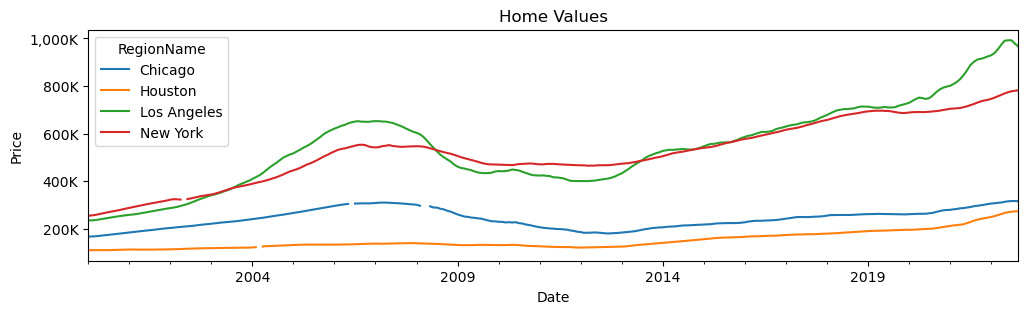

In [31]:
ax=unstacked['value'].plot(figsize=(12,3),title='Home Values')
ax.set_ylabel('Price')
format = mticks.FuncFormatter(k_convert)
ax.yaxis.set_major_formatter(format);

#### Q1: Which City had the highest Typical Home Value at the end of 2008? Which had the least?

In [36]:
unstacked.loc[pd.IndexSlice['2008'],:].mean()

       RegionName 
value  Chicago        284151.400000
       Houston        135163.083333
       Los Angeles    535684.000000
       New York       530794.166667
dtype: float64

##### At the end of 2008
- **Highest Home Values**: New York, at $530,794.17
  
- **Lowest Home Values**: Houston, at $135,163.08

#### Q2: How much did the home values change from November 2008 to December 2008 (in dollars)?

In [34]:
diff=unstacked.diff()
diff

value                             
RegionName Chicago Houston Los Angeles New York
Date                                           
2000-01-31     NaN     NaN         NaN      NaN
2000-02-29   397.0    11.0       220.0   1827.0
2000-03-31   832.0  -201.0      1112.0   1690.0
2000-04-30  1458.0     3.0      2076.0   3103.0
2000-05-31  1673.0   -47.0      2524.0   2894.0
...            ...     ...         ...      ...
2022-05-31  2838.0  4457.0     17223.0   6476.0
2022-06-30  2176.0  3343.0      1946.0   5147.0
2022-07-31  1247.0  2158.0       293.0   3748.0
2022-08-31  -323.0  1341.0    -14434.0   2268.0
2022-09-30  -158.0   239.0    -11601.0   1662.0

[273 rows x 4 columns]

In [37]:
diff.loc[pd.IndexSlice['11/01/2008':'12/01/2008'],:]

value                             
RegionName Chicago Houston Los Angeles New York
Date                                           
2008-11-30 -3790.0  -942.0     -9074.0  -3281.0

##### Home Value Change From November to December 2008
- **Chicago:** -$3,790.00
  
- **Houston:** -$942.00
  
- **Los Angeles:** -$9,074.00
  
- **New York:** -$3,281.00
  